<a href="https://colab.research.google.com/github/vats98754/cv2-from-scratch/blob/main/core_operations/filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys

In [ ]:
!{sys.executable} -m pip install -r ../requirements.txt

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /opt/homebrew/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

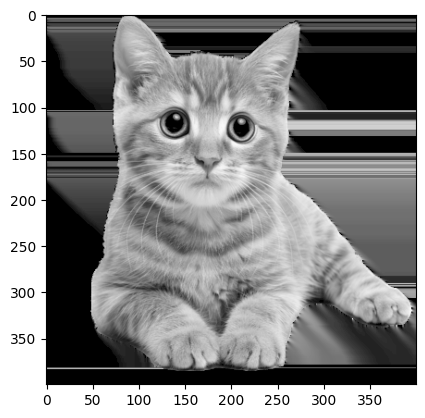

In [ ]:
img = cv2.imread("../cat.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

In [ ]:
# Non-linear filters
# 1. Median filter
def apply_median_filter(img, ksize=3):
    kernel_height_halved = int((ksize-1)/2)
    kernel_width_halved = int((ksize-1)/2)
    img = np.pad(img, ((kernel_height_halved, kernel_height_halved),
                    (kernel_width_halved, kernel_width_halved)),
                mode='constant', constant_values=0)
    convolution = []
    img_height = img.shape[0]
    img_width = img.shape[1]
    # start at row kernel_height_halved, end at row img_height-kernel_height_halved
    for i in range(kernel_height_halved, img_height-kernel_height_halved):
        lst = []
        # start at col kernel_width_halved, end at col img_width-kernel_height_halved
        for j in range(kernel_width_halved, img_width-kernel_width_halved):
            lst.append(np.median(img[i-kernel_height_halved:i+kernel_height_halved+1,
                            j-kernel_width_halved:j+kernel_width_halved+1]))
        convolution.append(lst)
    return convolution


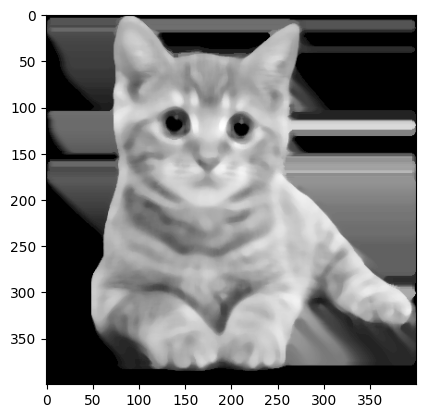

In [ ]:
median_img = apply_median_filter(img, ksize=9)
plt.imshow(median_img, cmap='gray')

In [ ]:
# weight assigned for pixel (k, l) to denoise pixel (i, j)
def weight(img, i, j, k, l, sigma_spatial, sigma_intensity):
    # is never 0 as you cannot have input -inf
    intensity_diff = img[i][j] - img[k][l]
    spatial_term = -((i - k)**2 + (j - l)**2) / (2 * sigma_spatial**2)
    intensity_term = -(intensity_diff**2) / (2 * sigma_intensity**2)
    return np.exp(spatial_term + intensity_term)

def denoised_intensity(img, i, j, sigma_spatial, sigma_intensity, startk, endk, startl, endl):
    sum_ij = 0
    sum_weights = 0
    for k in range(startk, endk):
        for l in range(startl, endl):
            weight_kl = weight(img, i, j, k, l, sigma_spatial, sigma_intensity)
            sum_ij += img[k][l] * weight_kl
            sum_weights += weight_kl
    return sum_ij/sum_weights

# Apply Bilateral Filter (smooths the image while respecting edges)
def apply_bilateral_filter(img, kernel=(3,3), sigma_spatial=1, sigma_intensity=1):
    kernel_height_halved = int((kernel[1]-1)/2)
    kernel_width_halved = int((kernel[0]-1)/2)
    img = np.pad(img, ((kernel_height_halved, kernel_height_halved),
                    (kernel_width_halved, kernel_width_halved)),
                mode='constant', constant_values=0)
    bilateral = []
    img_height = img.shape[0]
    img_width = img.shape[1]
    # start at row kernel_height_halved, end at row img_height-kernel_height_halved
    for i in range(kernel_height_halved, img_height-kernel_height_halved):
        lst = []
        # start at col kernel_width_halved, end at col img_width-kernel_height_halved
        for j in range(kernel_width_halved, img_width-kernel_width_halved):
            lst.append(denoised_intensity(img,i,j,sigma_spatial,sigma_intensity,
                                          startk=i-kernel_height_halved,
                                          endk=i+kernel_height_halved+1,
                                          startl=j-kernel_width_halved,
                                          endl=j+kernel_width_halved+1))
        bilateral.append(lst)

    return bilateral

/var/folders/l_/pykbbq2j777fxwk23__0mbpc0000gq/T/ipykernel_82315/2450073730.py:4: RuntimeWarning: overflow encountered in scalar subtract
  intensity_diff = img[i][j] - img[k][l]
/var/folders/l_/pykbbq2j777fxwk23__0mbpc0000gq/T/ipykernel_82315/2450073730.py:6: RuntimeWarning: overflow encountered in scalar negative
  intensity_term = -(intensity_diff**2) / (2 * sigma_intensity**2)


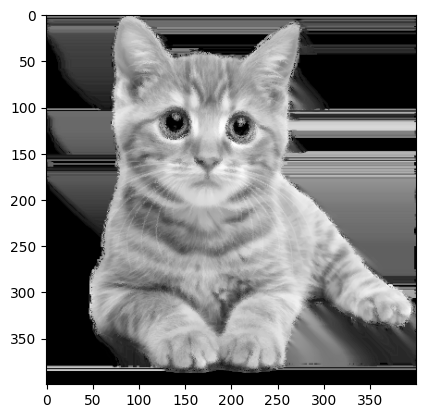

In [ ]:
bilateral_img = apply_bilateral_filter(img, (5,5), 2, 3)
plt.imshow(bilateral_img, cmap='gray')